<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic11/HFST11_oefeningen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

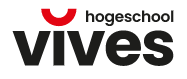<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# 11. Deep learning for text: Oefeningen

## Oefening 1

Hieronder zie je een lijst met strings. De strings zijn [Haiku's](https://examples.yourdictionary.com/examples-of-haiku-poems.html), een vorm van Japanse dichtkunst.

- Print de Haiku's mooi onder elkaar uit.
- Pas tokenization en stemming toe op de strings en print het resultaat uit.
- Pas tokenization en lemmatization toe op de strings en print het resultaat uit.

Ga na wat het verschil is tussen het resultaat van stemming en dat van lemmatization. Zorg ervoor dat in beide gevallen de leestekens zijn verwijderd en dat er geen hoofdletters meer voorkomen in de strings. Je kan hiervoor gebruik maken van `string.punctuation` en string methode `lower()`. Schrijf Pythonic code door gebruik te maken van list comprehensions!

Maak gebruik van de NLTK library. De volgende links kunnen je op weg helpen:

- https://www.nltk.org/api/nltk.tokenize.html
- https://www.nltk.org/howto/stem.html
- https://www.holisticseo.digital/python-seo/nltk/lemmatize





In [ ]:
haikus = ["Autumn moonlight -\na worm digs silently\ninto the chestnut.",
          "In the moonlight,\nThe color and scent of the wisteria\nSeems far away.",
          "Light of the moon\nMoves west, flowers' shadows\nCreep eastward.",
          "A summer river being crossed\nhow pleasing\nwith sandals in my hands!",
          "The summer river:\nalthough there is a bridge, my horse\ngoes through the water."]

### Oplossing

In [ ]:
# uitprinten
for haiku in haikus:
    print(haiku)
    print()

Autumn moonlight -
a worm digs silently
into the chestnut.

In the moonlight,
The color and scent of the wisteria
Seems far away.

Light of the moon
Moves west, flowers' shadows
Creep eastward.

A summer river being crossed
how pleasing
with sandals in my hands!

The summer river:
although there is a bridge, my horse
goes through the water.



In [ ]:
# stemming
import string
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
docs = [[stemmer.stem(word) for word in wordpunct_tokenize(haiku)
         if word not in string.punctuation]
        for haiku in haikus]

for doc in docs:
    print(" ".join(doc))
print()

autumn moonlight a worm dig silent into the chestnut
in the moonlight the color and scent of the wisteria seem far away
light of the moon move west flower shadow creep eastward
a summer river be cross how pleas with sandal in my hand
the summer river although there is a bridg my hors goe through the water


In [ ]:
# lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(word).lower() for word in wordpunct_tokenize(haiku)
         if word not in string.punctuation]
        for haiku in haikus]

for doc in docs:
    print(" ".join(doc))
print()

autumn moonlight a worm dig silently into the chestnut
in the moonlight the color and scent of the wisteria seems far away
light of the moon moves west flower shadow creep eastward
a summer river being crossed how pleasing with sandal in my hand
the summer river although there is a bridge my horse go through the water



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Oefening 2

Hieronder zie je een lijst die 2 strings bevat. De strings bestaan uit woorden die kleuren voorstellen.

1. Standaardiseer de strings.
2. Splits de strings op het niveau van de woorden (word-level tokenization).
3. Stel de vocabulary op (en voeg mask en OOV token toe!).
4. Maak gebruik van de vocabulary om de gesplitste strings te vectoriseren naar:
  - integer vectoren (+ padding!);
  - one-hot encoded matrices;
  - een document-term matrix (DTM);
  - een multi-hot encoded matrix;
  - een TF-IDF matrix.

Schrijf eerst je eigen code. Doe dan hetzelfde m.b.v. de Keras `TextVectorizer` layer. Voor de one-hot encoding kan je gebruik maken van function `tensorflow.one_hot()`.

(Herinner je dat we in het vak Machine Learning Fundamentals gebruik hebben gemaakt van de `CountVectorizer` klasse uit Scikit-Learn module `feature_extraction.text` voor het opstellen van een DTM).




In [ ]:
kleuren = ["rood groen blauw geel zwart wit blauw geel wit rood",
           "ROOD, BLAUW, ROOD, PAARS, ROOD, ZWART, BLAUW"]

### Oplossing

**Eigen code**

In [ ]:
# standardization + tokenization
import re
docs = [re.sub(r'[^\w\s]', '', doc.lower()).strip().split() for doc in kleuren]
for doc in docs:
    print(doc)

['rood', 'groen', 'blauw', 'geel', 'zwart', 'wit', 'blauw', 'geel', 'wit', 'rood']
['rood', 'blauw', 'rood', 'paars', 'rood', 'zwart', 'blauw']


In [ ]:
# vocabulary indexing
tokens = set([token for doc in docs for token in doc])
voc = {token: i+2 for i, token in enumerate(tokens)}
voc[''] = 0  # mask
voc['[unk]'] = 1  # OOV
voc

{'rood': 2,
 'wit': 3,
 'paars': 4,
 'blauw': 5,
 'zwart': 6,
 'geel': 7,
 'groen': 8,
 '': 0,
 '[unk]': 1}

In [ ]:
# integer vectors
import numpy as np

ndocs = len(kleuren)
n = max([len(doc) for doc in docs])  # max lengte van een document
ids = np.zeros((ndocs, n), dtype=int)
for i, doc in enumerate(docs):
    for j, token in enumerate(doc):
        ids[i, j] = voc[token] if token in doc else voc['[unk]']
ids

array([[2, 8, 5, 7, 6, 3, 5, 7, 3, 2],
       [2, 5, 2, 4, 2, 6, 5, 0, 0, 0]])

In [ ]:
# one-hot encoding
nvoc = len(voc)
one_hot = np.zeros((ndocs, n, nvoc), dtype=int)
for i, sample in enumerate(ids):
    for j, id in enumerate(sample):
        one_hot[i, j, id] = 1
one_hot

array([[[0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0]]])

In [ ]:
# DTM
dtm = np.array([np.array([(i==id).sum() for i in range(2, nvoc)]) for id in ids])
dtm

array([[2, 2, 0, 2, 1, 2, 1],
       [3, 0, 1, 2, 1, 0, 0]])

In [ ]:
# multi-hot encoding
multi_hot = dtm.astype(bool).astype(int)
multi_hot

array([[1, 1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 0]])

In [ ]:
# TF-IDF volgens boek
tf_idf = dtm / np.log(dtm.sum(axis=0, keepdims=True) + 1)
np.round(tf_idf, 4)

array([[1.1162, 1.8205, 0.    , 1.2427, 0.9102, 1.8205, 1.4427],
       [1.6743, 0.    , 1.4427, 1.2427, 0.9102, 0.    , 0.    ]])

In [ ]:
# TF-IDF volgens Keras
# https://linux-blog.anracom.com/2021/10/11/tf-idf-which-formula-to-take-in-combination-with-the-keras-tokenizer/
tf_idf_2 = dtm * np.log(1 + ndocs / (multi_hot.sum(axis=0, keepdims=True) + 1))
np.round(tf_idf_2, 4)

array([[1.0217, 1.3863, 0.    , 1.0217, 0.5108, 1.3863, 0.6931],
       [1.5325, 0.    , 0.6931, 1.0217, 0.5108, 0.    , 0.    ]])

**`TextVectorization` layer**

In [ ]:
# standardization + tokenization
from tensorflow.keras.layers import TextVectorization

text_vectorization_ids = TextVectorization(output_mode='int')
text_vectorization_ids.adapt(kleuren)
text_vectorization_ids.get_vocabulary()

['', '[UNK]', 'rood', 'blauw', 'zwart', 'wit', 'geel', 'paars', 'groen']

In [ ]:
# integer vectors
k_ids = text_vectorization_ids(kleuren)
k_ids.numpy()

array([[2, 8, 3, 6, 4, 5, 3, 6, 5, 2],
       [2, 3, 2, 7, 2, 4, 3, 0, 0, 0]])

In [ ]:
# one-hot encoding
import tensorflow as tf
k_one_hot = tf.one_hot(k_ids, depth=len(voc))
k_one_hot.numpy()

array([[[0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]]], dtype=float32)

In [ ]:
# DTM
text_vectorization_dtm = TextVectorization(output_mode='count')
text_vectorization_dtm.adapt(kleuren)
k_dtm = text_vectorization_dtm(kleuren)
k_dtm.numpy()

array([[0., 2., 2., 1., 2., 2., 0., 1.],
       [0., 3., 2., 1., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
# multi-hot encoding
text_vectorization_multi_hot = TextVectorization(output_mode='multi_hot')
text_vectorization_multi_hot.adapt(kleuren)
k_multi_hot = text_vectorization_multi_hot(kleuren)
k_multi_hot.numpy()

array([[0., 1., 1., 1., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
# TF-IDF
text_vectorization_tf_idf = TextVectorization(output_mode='tf_idf')
text_vectorization_tf_idf.adapt(np.array(kleuren))
k_tf_idf = text_vectorization_tf_idf(kleuren)
np.round(k_tf_idf.numpy(), 4)

array([[0.    , 1.0217, 1.0217, 0.5108, 1.3863, 1.3863, 0.    , 0.6931],
       [0.    , 1.5325, 1.0217, 0.5108, 0.    , 0.    , 0.6931, 0.    ]],
      dtype=float32)

## Oefening 3

Lees de file `'deep_learning_aliens.csv'` in. Het bevat tekstfragmenten van aliens en een indicatie van het bijhorende sentiment dat de fragmenten uitdrukken (`'happy'` of `'sad'`).

Pas eerst logistic regression, multinomiale en Bernoulli naive Bayes toe om de tekstfragmenten te classificeren op hun sentiment. Stel daarna een eenvoudig feedforward netwerk op.

Het gaat om een synthetische dataset zonder ruis. Het is dus perfect mogelijk om hier 100% nauwkeurigheid te halen. Je hoeft dus ook de dataset niet op te splitsen.

Om je geheugen op te frissen: dit zijn de klassen die je nodig hebt voor logistic regression en naive Bayes:

```python
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
```


### Oplossing

Ter info de code waarmee de dataset werd gecreëerd:

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(2022)

# generate labels
voc = np.array(['aack', 'beep', 'crack', 'kling', 'burp', 'dong', 'psss', 'ugh', 'pfff', 'djee'])  # vocabulary
numbers = lambda: np.random.randint(0, 10, size=10)  # function to generate frequency for each word in vocabulary
N = [numbers() for _ in range(10_000)]  #  generate frequencies for 10 000 samples
scores = [num.sum() for num in N]  # score of each sample is the total number of words
_, b = np.histogram(scores, bins=2)  # create histogram dividing up scores in two classes
c = [int(score >= b[1]) for score in scores]  # assign integer labels to samples
labels = np.array(['sad', 'happy'])[c]  # convert integer labels to text

# create the text samples by shuffling the words and adding punctuations randomly
punct = lambda lst: np.random.choice([' ', '? ', ' ', '! ', ' ', ', ', ' ', '; ', ' ', ' - ', ' ', ': '], len(lst))
capit = lambda: np.random.choice([lambda s: s.upper(), lambda s: s.capitalize(), lambda s: s.lower()])
text = []
for num in N:
    zin = [woord for woorden in [[voc[i]]*n for i, n in enumerate(num)] for woord in woorden]
    np.random.shuffle(zin)
    zin = np.array([capit()(word) for word in zin])[:, np.newaxis]
    tekens = punct(zin)[:, np.newaxis]
    text.append("".join(np.hstack((zin, tekens)).flatten()))

# write samples and labels to dataframe and to csv-file
df = pd.DataFrame(dict(text=text, sentiment=labels))
df.to_csv("deep_learning_aliens.csv")

De eigenlijke oplossing:

In [ ]:
# import statements
import numpy as np
import pandas as pd

In [ ]:
# reading csv-file
df = pd.read_csv("deep_learning_aliens.csv")
df.head()

,Unnamed: 0,text,sentiment
0,0,"psss; djee! dong Djee Burp, Djee ugh - Ugh: UG...",sad
1,1,KLING; Kling: aack - BEEP: AACK kling AACK pss...,sad
2,2,burp! burp! AACK - DJEE Ugh psss! aack KLING! ...,sad
3,3,Psss: Crack Beep! AACK; PSSS AACK - psss? Dong...,sad
4,4,"kling DONG DONG, Dong PFFF Dong CRACK? Aack Dj...",happy


In [ ]:
# check number of 'happy' labels -> dataset is imbalanced!
(df['sentiment'] == 'happy').sum()

6068

In [ ]:
# vectorization using word counts
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(
    ngrams=1,
    max_tokens=100,
    output_mode="count",
)

text_vectorization.adapt(df.text.values)
text_vectorization.get_vocabulary()

['[UNK]',
 'kling',
 'burp',
 'pfff',
 'dong',
 'psss',
 'djee',
 'beep',
 'crack',
 'ugh',
 'aack']

In [ ]:
# create inputs X and integer labels y
X = text_vectorization(df.text.values).numpy()
y = (df['sentiment'] == 'happy').astype(int)
X.shape, y.shape

((10000, 11), (10000,))

In [ ]:
# check for zero columns and remove
not_all_zero = X.sum(axis=0).astype(int) > 0
X = X[:, not_all_zero]
X.shape

(10000, 10)

In [ ]:
# maximum number of words needed for normalizing X
max_number = X.sum(axis=1).max()
max_number

75.0

In [ ]:
# create TensorFlow Dataset
import tensorflow as tf

Xn = X / max_number  # herschalen
dataset = tf.data.Dataset.from_tensor_slices((Xn, y))
for sample, target in dataset:
    print(sample)
    print(target)
    break

tf.Tensor(
[0.         0.09333333 0.         0.10666667 0.02666667 0.06666667
 0.01333333 0.01333333 0.10666667 0.        ], shape=(10,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
# create batches of size 32
dataset = dataset.batch(32)

In [ ]:
# apply small learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

lr = LogisticRegression(penalty="none")
lr.fit(X, y);
print("logistic regression:", lr.score(X, y))

mnb = MultinomialNB()
mnb.fit(X, y);
print("multinomial naive bayes:", mnb.score(X, y))

Xb = X.astype(bool).astype(int)  # X omzetten naar binaire matrix
bnb = BernoulliNB()
bnb.fit(Xb, y);
print("bernoulli naive bayes:", bnb.score(Xb, y))

logistic regression: 1.0
multinomial naive bayes: 0.6068
bernoulli naive bayes: 0.7184


In [ ]:
# create neural network with 1 node and sigmoid (= logistic regression!)
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(X.shape[-1],), name='input')
outputs = layers.Dense(1, activation="sigmoid", name="output")(inputs)
model = keras.Model(inputs, outputs, name="logistic_regression_keras")
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "logistic_regression_keras"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 10)]              0         
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training and evaluation
history = model.fit(dataset, epochs=500, verbose=0)
loss, acc = model.evaluate(dataset)
print(acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.9953
0.9952999949455261


In [ ]:
# function to plot loss and acc
import matplotlib.pyplot as plt

def plot_result(history):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='training');
    ax1.set_title('loss');
    ax1.legend();
    ax1.grid();
    ax2.plot(history.history['accuracy'], label='training');
    try:
        ax1.plot(history.history['val_loss'], label='validation');
        ax2.plot(history.history['val_accuracy'], label='validation');
    except:
        pass
    ax2.set_title('accuracy');
    ax2.legend();
    ax2.grid();

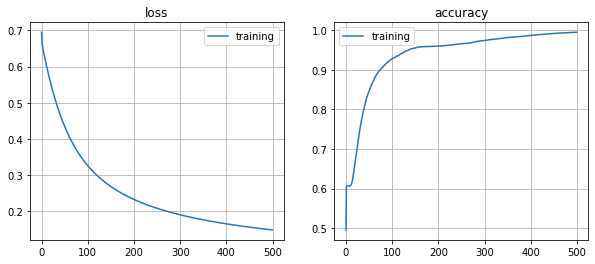

In [ ]:
# plot loss and acc
plot_result(history)

Conclusies:
- Logistic regression haalt 100% obv word counts
- Naive Bayes algoritmes doen het niet goed. De multinomiale variant doet het zelfs niet beter dan de random classifier!
- We halen 100% bij logistic regression, dus het volstaat om voor het deep learning model 1 node te nemen. Omdat we ook de sigmoïdefunctie toepassen, doet dit model hetzelfde als logistic regression. Alleen past het RMSprop toe als optimizer, wat in dit geval veel minder efficiënt is, want na 500 epochs hebben we nog steeds geen 100% nauwkeurigheid (ook al zitten we er dicht bij).

## Oefening 4

Download de volgende dataset van Kaggle:
https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/.

De dataset bevat tweets van passagiers die gevlogen hebben met één van de luchtvaartmaatschappijen in de VS en hun mening geven over hoe ze hun vlucht hebben ervaren.

Train een neuraal netwerk dat de tweets kan classificeren volgens de drie aangegeven klassen: positief, negatief of neutraal. Neem voor de zekerheid de tweets waarvan het label een hoge betrouwbaarheid heeft gekregen. Splits de dataset op in training-, validatie- en testset.

Stel je de vraag welk model je gaat nemen: een bag-of-words model of een sequence model? Tip: in het boek staat een vuistregel die je kan helpen om de keuze tussen beide te maken!

### Oplossing

In [ ]:
# download dataset
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d crowdflower/twitter-airline-sentiment

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 116MB/s]


In [ ]:
# unpack zip-file
import shutil
shutil.unpack_archive('twitter-airline-sentiment.zip')

In [ ]:
# read csv-file and check columns
import numpy as np
import pandas as pd

df = pd.read_csv("Tweets.csv")
list(df.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

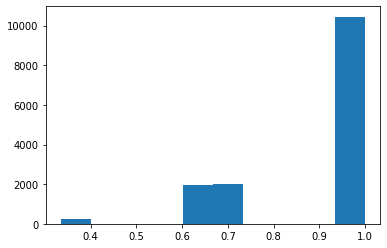

In [ ]:
# check sentiment confidences
plt.hist(df.airline_sentiment_confidence, bins=10);

In [ ]:
# only keep tweets with sentiment confidence > 90%
high = df.airline_sentiment_confidence > 0.9
df_high = df.loc[high, ['text', 'airline_sentiment']]
df_high.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [ ]:
# shuffle rows
df_high = df_high.sample(frac=1).reset_index()

In [ ]:
# check classes
list(df_high.airline_sentiment.unique())

['negative', 'neutral', 'positive']

In [ ]:
# labels to integers:
# 0 = negative
# 1 = positive
# 2 = neutral
y = np.array([0 if s == 'negative' else 1 if s == 'positive' else 2
              for s in df_high.airline_sentiment.values])

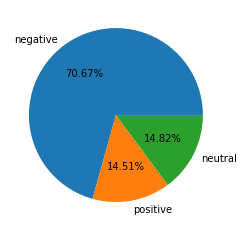

In [ ]:
# pie chart:
# -> dataset is highly imbalanced
# -> baseline is 70.7% acc
from matplotlib import pyplot as plt
labels = ['negative', 'positive', 'neutral']
numbers = [(y == i).sum() for i in range(len(labels))]
plt.pie(numbers, labels=labels, autopct='%1.2f%%');

In [ ]:
# check some tweets
text = df_high.text.values
for tweet in text[:5]:
    print(tweet)

@USAirways Your policy needs a serious revision for babies.  Fortunately I have choices and choose @Southwest from here on out.
@united 6344,6373, Sfo-Dfw also 1576 SFO-ORD
@USAirways - love the changes in the lounge - cheese, veggies, olives in addition to the crackers and snack mix,
@united at what pt do u just Cancelled Flight!  Finally got stndby 4 1pm flight. What a day!  #missedWork #clientNotHappy http://t.co/sUPrLfOi8T
@AmericanAir stranded in Miami because your automated system keeps hanging up on me for two days. Help !


In [ ]:
# rule of thumb:
# -> ratio < 1500
# -> bag-of-words model is best choice?
num_samples = len(y)
print('number of samples:', num_samples)
avg_num_words = np.mean([len(tweet.split()) for tweet in text])
print('average length:', avg_num_words)
print('ratio:', num_samples / avg_num_words)

number of samples: 10458
average length: 18.31449607955632
ratio: 571.0230821842711


**TF-IDF weighted bag-of-bigrams**

In [ ]:
# we could use TweetTokenizer from NLTK
from nltk.tokenize import TweetTokenizer
from nltk import bigrams

tkn = TweetTokenizer(preserve_case=False)
print(text[0])
print()
print(tkn.tokenize(text[0]))
print()
for bigram in bigrams(tkn.tokenize(text[0])):
    print(bigram)

@USAirways Your policy needs a serious revision for babies.  Fortunately I have choices and choose @Southwest from here on out.

['@usairways', 'your', 'policy', 'needs', 'a', 'serious', 'revision', 'for', 'babies', '.', 'fortunately', 'i', 'have', 'choices', 'and', 'choose', '@southwest', 'from', 'here', 'on', 'out', '.']

('@usairways', 'your')
('your', 'policy')
('policy', 'needs')
('needs', 'a')
('a', 'serious')
('serious', 'revision')
('revision', 'for')
('for', 'babies')
('babies', '.')
('.', 'fortunately')
('fortunately', 'i')
('i', 'have')
('have', 'choices')
('choices', 'and')
('and', 'choose')
('choose', '@southwest')
('@southwest', 'from')
('from', 'here')
('here', 'on')
('on', 'out')
('out', '.')


In [ ]:
# TweetTokenizer keeps special characters like @ and #
# we could do the same using TextVectorization and defining a custom standarize function
# that does not remove punctuation (but in the end we did not...)
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(
    ngrams=2,  # bigrams
    max_tokens=30_000,
    output_mode="tf_idf",  # TF-IDF
    #standardize=lambda string_tensor: tf.strings.lower(string_tensor),  # string_tensor is tf Tensor!
)

text_vectorization.adapt(text)
print(text_vectorization.get_vocabulary()[:10])
print(text_vectorization.get_vocabulary()[-10:])

['[UNK]', 'to', 'the', 'i', 'a', 'for', 'you', 'flight', 'united', 'and']
['used our', 'used hope', 'used for', 'used by', 'used a', 'used 2days', 'useable possible', 'useable', 'use whatsoever', 'use what']


In [ ]:
# create TF-IDF matrix
X = text_vectorization(text).numpy()
X.shape

(10458, 30000)

In [ ]:
# split dataset
ntrain = 7500
nval = 1500
n = ntrain + nval

Xtrain = X[:ntrain]
ytrain = y[:ntrain]
print(Xtrain.shape, ytrain.shape)

Xval = X[ntrain:n]
yval = y[ntrain:n]
print(Xval.shape, yval.shape)

Xtest = X[n:]
ytest = y[n:]
print(Xtest.shape, ytest.shape)

(7500, 30000) (7500,)
(1500, 30000) (1500,)
(1458, 30000) (1458,)


In [ ]:
# create tf training Dataset
train_ds = tf.data.Dataset.from_tensor_slices((Xtrain, ytrain))
for sample, target in train_ds:
    print(sample)
    print(target)
    break

tf.Tensor([77.61456  0.       0.      ...  0.       0.       0.     ], shape=(30000,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
# set batch size to 32
batch_size = 32
train_ds = train_ds.batch(batch_size)

In [ ]:
# create tf validation and test Dataset
val_ds = tf.data.Dataset.from_tensor_slices((Xval, yval)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((Xtest, ytest)).batch(batch_size)

In [ ]:
# build and compile the model
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(X.shape[-1],), name="input")
x = layers.Dense(16, activation="relu", name="dense1")(inputs)
x = layers.Dropout(0.2, name="dropout1")(x)
x = layers.Dense(8, activation="relu", name="dense2")(x)
x = layers.Dropout(0.2, name="dropout2")(x)
x = layers.Dense(4, activation="relu", name="dense3")(x)
x = layers.Dropout(0.2, name="dropout3")(x)
outputs = layers.Dense(3, activation="softmax", name="output")(x)
model = keras.Model(inputs, outputs, name="bag_of_bigrams")

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "bag_of_bigrams"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 30000)]           0         
                                                                 
 dense1 (Dense)              (None, 16)                480016    
                                                                 
 dropout1 (Dropout)          (None, 16)                0         
                                                                 
 dense2 (Dense)              (None, 8)                 136       
                                                                 
 dropout2 (Dropout)          (None, 8)                 0         
                                                                 
 dense3 (Dense)              (None, 4)                 36        
                                                                 
 dropout3 (Dropout)          (None, 4)              

In [ ]:
# train the model
from keras.callbacks import ModelCheckpoint as checkpoint

history = model.fit(train_ds, epochs=10, validation_data=val_ds,
                    callbacks=[checkpoint("tweets_bigrams.keras", save_best_only=True)])

Epoch 1/10
235/235 [==============================] - 6s 22ms/step - loss: 1.0052 - accuracy: 0.7168 - val_loss: 0.8887 - val_accuracy: 0.7813
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.8084 - accuracy: 0.7927 - val_loss: 0.7518 - val_accuracy: 0.7900
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6811 - accuracy: 0.8112 - val_loss: 0.6705 - val_accuracy: 0.8020
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.5903 - accuracy: 0.8224 - val_loss: 0.6193 - val_accuracy: 0.8013
Epoch 5/10
235/235 [==============================] - 5s 22ms/step - loss: 0.5191 - accuracy: 0.8339 - val_loss: 0.5349 - val_accuracy: 0.8260
Epoch 6/10
235/235 [==============================] - 5s 22ms/step - loss: 0.4472 - accuracy: 0.8629 - val_loss: 0.4798 - val_accuracy: 0.8533
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.3775 - accuracy: 0.8881 - val_loss: 0.4604 - val_accuracy: 0.8713

In [ ]:
# function to plot loss and acc
import matplotlib.pyplot as plt

def plot_result(history):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='training');
    ax2.plot(history.history['accuracy'], label='training');
    try:
        ax1.plot(history.history['val_loss'], label='validation');
        ax2.plot(history.history['val_accuracy'], label='validation');
    except:
        pass
    ax1.set_title('loss');
    ax1.legend();
    ax1.grid();
    ax2.set_title('accuracy');
    ax2.legend();
    ax2.grid();

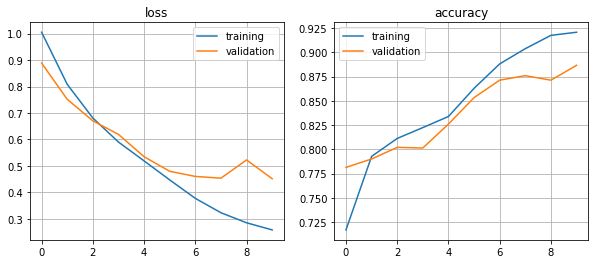

In [ ]:
# plot loss and acc
plot_result(history)

In [ ]:
# evaluate model
model = keras.models.load_model("tweets_bigrams.keras")
print(f"Test acc: {model.evaluate(test_ds)[1]:.3f}")

46/46 [==============================] - 0s 4ms/step - loss: 0.4546 - accuracy: 0.8882
Test acc: 0.888


**Bidirectional LSTM**

In [ ]:
# Here we need integer vectors
text_vectorization = TextVectorization(
    max_tokens=30_000,
    output_mode="int",
    #standardize=lambda string_tensor: tf.strings.lower(string_tensor),  # string_tensor is tf Tensor!
)
text_vectorization.adapt(text)

In [ ]:
# create input matrix
X = text_vectorization(text).numpy()
X.shape

(10458, 36)

In [ ]:
# 36 columns as max length of the tweets is 36 tokens
max_num_words = np.max([len(tweet.split()) for tweet in text])
print('max length:', max_num_words)

max length: 36


In [ ]:
# split dataset
ntrain = 7500
nval = 1500

Xtrain = X[:ntrain]
ytrain = y[:ntrain]
print(Xtrain.shape, ytrain.shape)

Xval = X[ntrain:(ntrain+nval)]
yval = y[ntrain:(ntrain+nval)]
print(Xval.shape, yval.shape)

Xtest = X[(ntrain+nval):]
ytest = y[(ntrain+nval):]
print(Xtest.shape, ytest.shape)

(7500, 36) (7500,)
(1500, 36) (1500,)
(1458, 36) (1458,)


In [ ]:
# create tf training, validation, and test set
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices((Xtrain, ytrain)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((Xval, yval)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((Xtest, ytest)).batch(batch_size)

In [ ]:
# build and compile model
input_dim = text_vectorization.vocabulary_size()
inputs = keras.Input(shape=(None,), dtype="int64", name="input")
embedded = layers.Embedding(input_dim=input_dim, output_dim=256, mask_zero=True, name="embedding")(inputs)
x = layers.Bidirectional(layers.LSTM(32, return_sequences=True), name="bidir_LSTM1")(embedded)
x = layers.Bidirectional(layers.LSTM(32), name="bidir_LSTM2")(embedded)
x = layers.Dropout(0.5, name="dropout")(x)
outputs = layers.Dense(3, activation="softmax", name="output")(x)
model = keras.Model(inputs, outputs, name="bidirectional_RNN")

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "bidirectional_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 256)         3536896   
                                                                 
 bidir_LSTM2 (Bidirectional)  (None, 64)               73984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 output (Dense)              (None, 3)                 195       
                                                                 
Total params: 3,611,075
Trainable params: 3,611,075
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train model
history = model.fit(train_ds, epochs=5, validation_data=val_ds,
                    callbacks=[checkpoint("tweets_bidir_lstm.keras", save_best_only=True)])

Epoch 1/5
235/235 [==============================] - 30s 88ms/step - loss: 0.5183 - accuracy: 0.7997 - val_loss: 0.3553 - val_accuracy: 0.8640
Epoch 2/5
235/235 [==============================] - 19s 79ms/step - loss: 0.2808 - accuracy: 0.9051 - val_loss: 0.3185 - val_accuracy: 0.8793
Epoch 3/5
235/235 [==============================] - 19s 82ms/step - loss: 0.2034 - accuracy: 0.9309 - val_loss: 0.3306 - val_accuracy: 0.8833
Epoch 4/5
235/235 [==============================] - 18s 77ms/step - loss: 0.1611 - accuracy: 0.9464 - val_loss: 0.3596 - val_accuracy: 0.8787
Epoch 5/5
235/235 [==============================] - 19s 82ms/step - loss: 0.1284 - accuracy: 0.9591 - val_loss: 0.4122 - val_accuracy: 0.8693


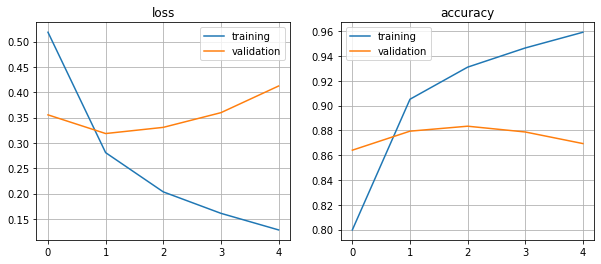

In [ ]:
# plot loss and acc
plot_result(history)

In [ ]:
# evaluate model
model = keras.models.load_model("tweets_bidir_lstm.keras")
print(f"Test acc: {model.evaluate(test_ds)[1]:.3f}")

46/46 [==============================] - 4s 14ms/step - loss: 0.3402 - accuracy: 0.8820
Test acc: 0.882


**Conclusie**

- Het bidirectional LSTM model doet het niet beter dan het bag-of-bigrams model, wat in overeenstemming is met de vuistregel uit het boek.
- Een grondiger analyse van de tekstdata kan leiden tot een vectorisatie die betere resultaten geeft.
- Beide modellen kunnen nog performanter gemaakt worden door verdere finetuning.

---